In [1]:
#pip install -qU pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm scipy catboost imbalanced-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from math import sqrt
from pickle import dump
from scipy import stats



## Análise exploratoria

In [3]:
df = pd.read_csv("bank customer churn dataset.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.shape

(10000, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

### Data Cleaning

In [10]:
df.rename(columns={'HasCrCard': 'Has credit card','IsActiveMember':'Is Active Member','CreditScore':'Credit Score',
                   'NumOfProducts':'Number Of Products','EstimatedSalary':'Estimated Salary','Exited':'Churned'} ,inplace=True)

In [11]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], inplace=True, axis=1)

### Basic Statistical Overview
- Summary Statistical: describe()

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Credit Score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
Number Of Products,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
Has credit card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
Is Active Member,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
Estimated Salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Churned,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


- Summary Statistical : **value_counts()**
----------------------

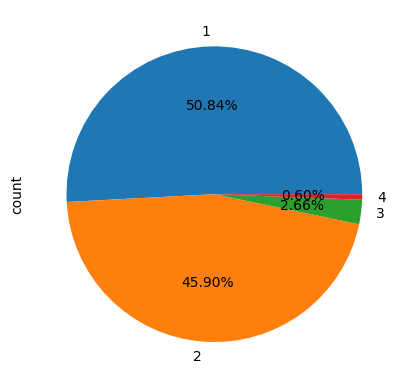

In [13]:
df['Number Of Products'].value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

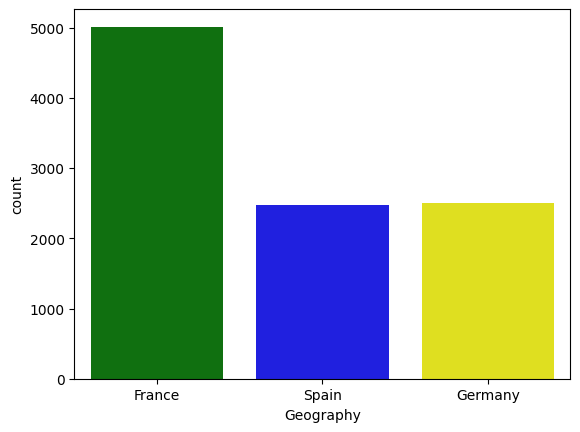

In [14]:
sns.countplot(x='Geography', data=df, hue='Geography', palette=['green','blue','yellow'], legend=False)
plt.show()

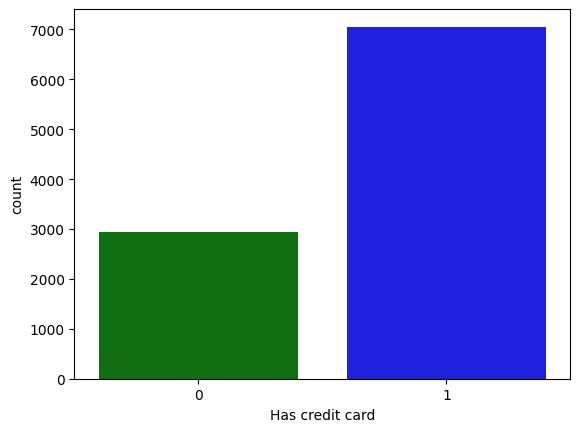

In [15]:
sns.countplot(x='Has credit card', hue='Has credit card', data=df, palette=['green','blue'], legend=False)
plt.show()

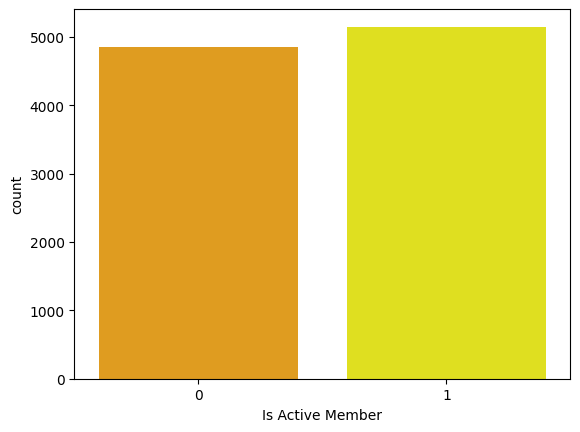

In [16]:
sns.countplot(x='Is Active Member', hue='Is Active Member', data=df, palette=['orange','yellow'], legend=False)
plt.show()

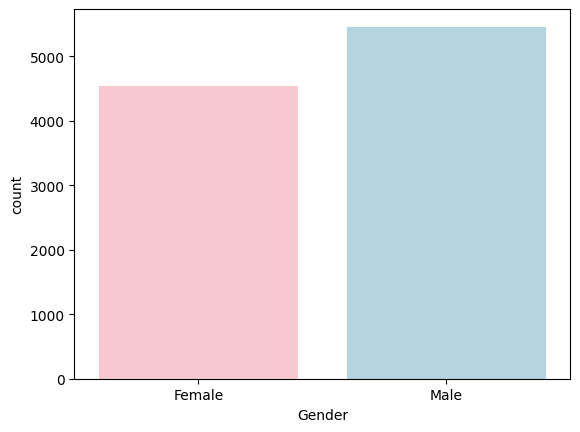

In [17]:
sns.countplot(x='Gender', hue='Gender', data=df, palette=['pink','lightblue'], legend=False)
plt.show()

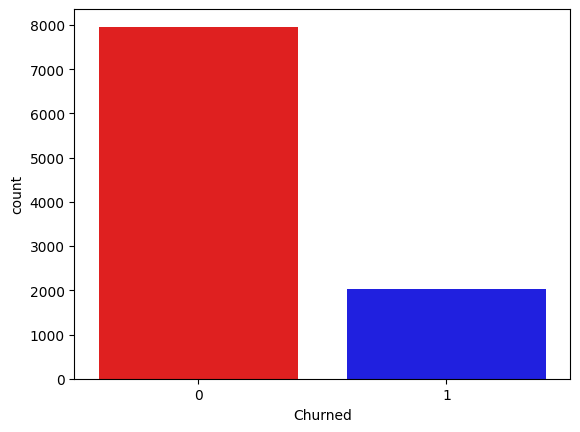

In [18]:
sns.countplot(x='Churned', hue='Churned', data=df, palette=['red','blue'], legend=False)
plt.show()

### Distribution of Variables
- Numerical Features (KDE)

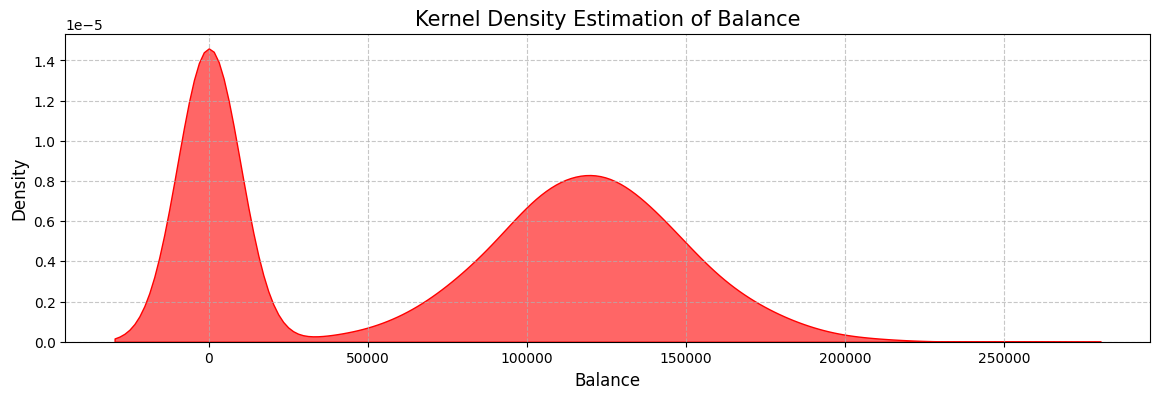

In [19]:
plt.figure(figsize=(14, 4))
sns.kdeplot(df['Balance'], fill=True, color='red', alpha=0.6)
plt.title('Kernel Density Estimation of Balance', fontsize=15)
plt.xlabel('Balance', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


- #### **Primeiro Pico:** O primeiro e menor pico está localizado em um saldo de aproximadamente 0. Isso sugere uma alta concentração de indivíduos com pouco ou nenhum saldo.
- #### **Segundo Pico:** O segundo e maior pico está centrado em um saldo de aproximadamente 120.000. Isso indica outro grupo significativo de indivíduos com saldos concentrados em torno desse valor mais alto.

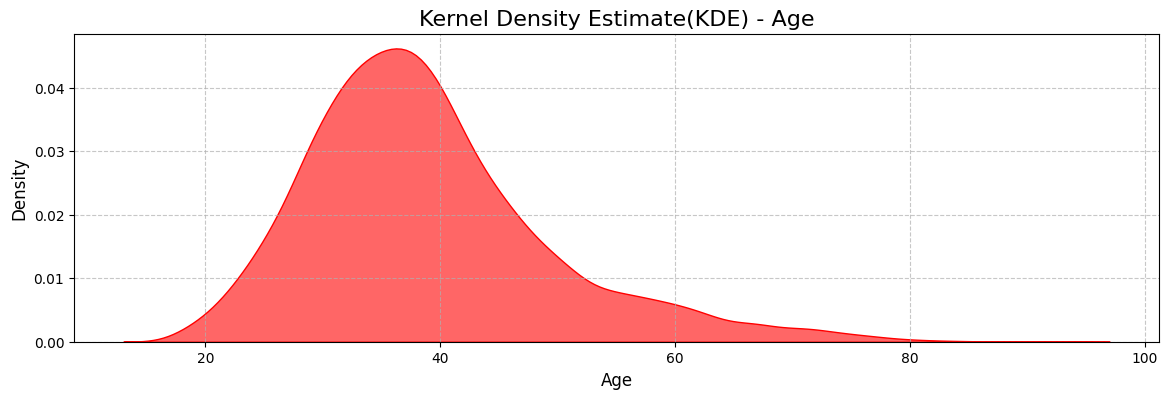

In [21]:
plt.figure(figsize=(14, 4))
sns.kdeplot(df['Age'], fill=True, color='red', alpha=0.6)
plt.title('Kernel Density Estimate(KDE) - Age',	fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


- #### **O gráfico revela uma distribuição com assimetria positiva (também conhecida como assimetria à direita). Isso significa que a cauda da distribuição se estende para a direita, indicando que, embora a maioria dos dados esteja concentrada no lado esquerdo, há um número menor de indivíduos em idades mais avançadas.**
- #### **A distribuição possui um único pico, ou moda, que representa a faixa etária mais frequente. A maior densidade de indivíduos está em torno dos 40 anos. A densidade diminui rapidamente após o pico, com uma queda gradual e prolongada em direção às idades mais altas, chegando a quase 100 anos. A densidade de indivíduos em idades mais jovens (abaixo de 20 anos) é muito baixa.**